# Identify underperforming crops from the provided raster dataset.



Band 3: Crop type predictions.

Band 4: Model confidence scores for Band 3.

Summarize these values at the field level and compare them against ground truth data list as 2 as follows.

In [64]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap, BoundaryNorm

from src.constants import LABELS_DICT

In [67]:
! gdalinfo /code/data/ml_2021-08-01_2022-12-31_u0c.tif

Driver: GTiff/GeoTIFF
Files: /code/data/ml_2021-08-01_2022-12-31_u0c.tif
Size is 5429, 5361
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.

ml_2021-08-01_2022-12-31_u0c.tif represents the inference outputs

In [68]:
ds = rasterio.open("/code/data/ml_2021-08-01_2022-12-31_u0c.tif")
predictions = ds.read(3)
ds.crs


CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

Text(0.5, 0.98, 'predictions')

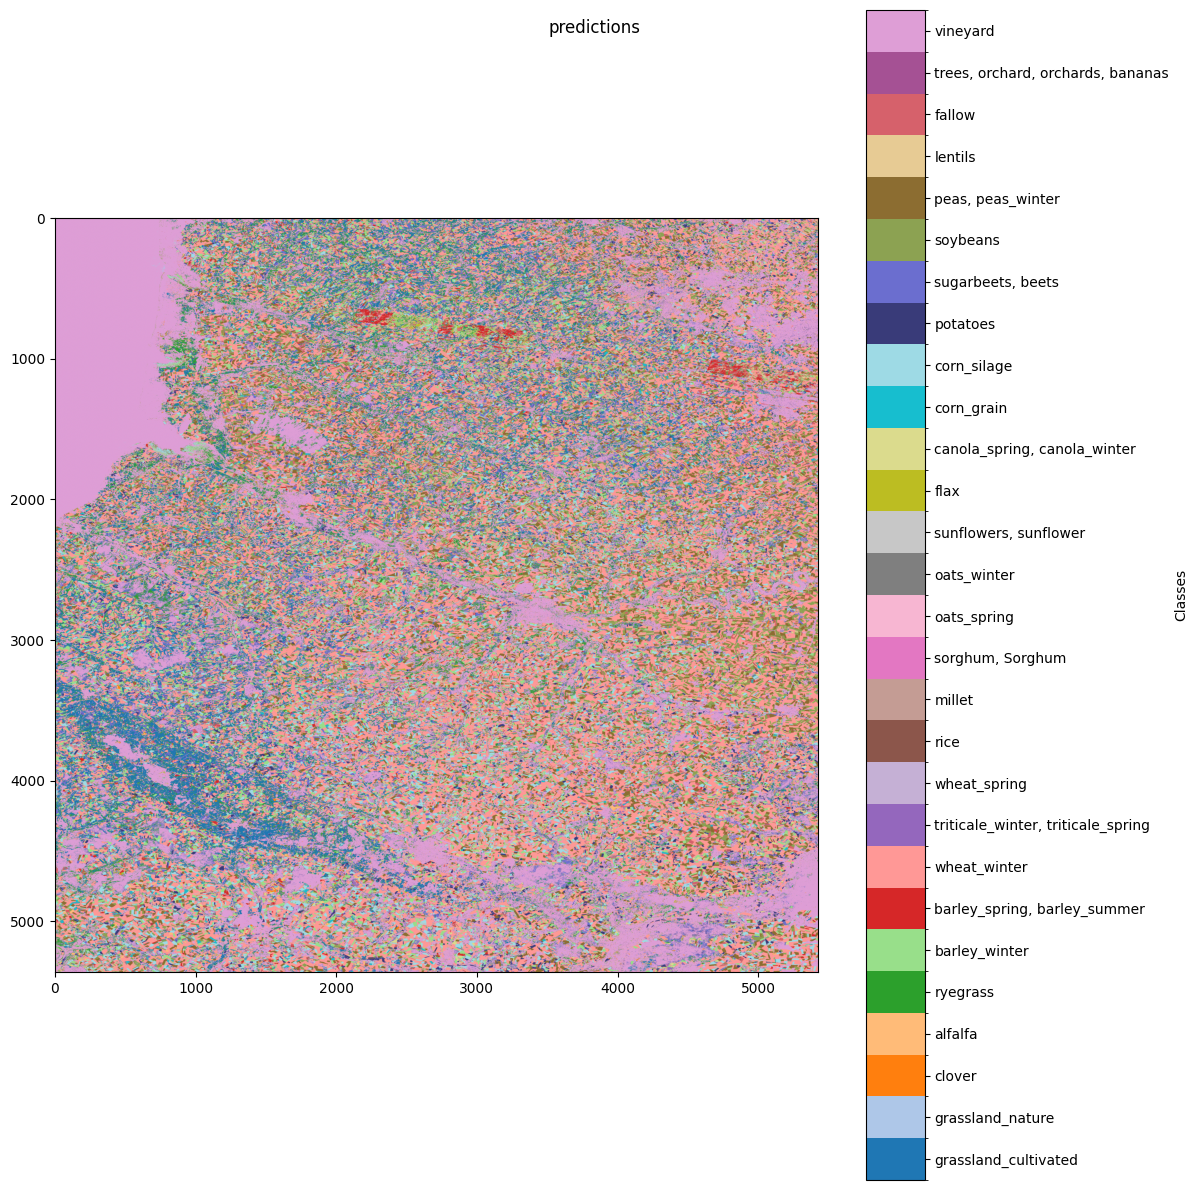

In [66]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))
classes = np.unique(predictions)
n_classes = len(classes)

colors1 = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.tab20b(np.linspace(0, 1, n_classes-20))
colors = np.vstack((colors1, colors2))
classes_cmap = ListedColormap(colors)
color_bounds = np.arange(-0.5, n_classes + 0.5)
classes_norm = BoundaryNorm(color_bounds, classes_cmap.N)

im = ax.imshow(predictions, cmap=classes_cmap, norm=classes_norm)
cbar = plt.colorbar(im, ticks=np.arange(n_classes))
cbar.set_label('Classes')
category_labels = [', '.join(LABELS_DICT[list(LABELS_DICT.keys())[ii]]) for ii in classes]
cbar.set_ticklabels(category_labels)

plt.tight_layout()
plt.suptitle("predictions")

In [15]:
gdf = gpd.read_file("/code/data/u0c_gt_filtered_2022.gpkg")
gdf

,field_id,area_m2,normalized_label,year,geometry
0,0b6947ad-48c3-4d4e-8180-0c5511d53cfa,4725.570410,vineyard,2022,"POLYGON ((1.68069 49.39478, 1.6807 49.39475, 1..."
1,ce190383-0a9c-4e07-babd-84231bca342f,3977.850757,vineyard,2022,"POLYGON ((1.53424 49.52747, 1.53498 49.5276, 1..."
2,509fd0e1-1a5b-4c18-9c34-ac3f92e250b6,12203.754334,vineyard,2022,"POLYGON ((2.28742 49.73154, 2.28695 49.73236, ..."
3,2f01fe6b-289d-45c0-976e-1c870921411f,14456.984724,vineyard,2022,"POLYGON ((2.28609 49.73127, 2.28555 49.73223, ..."
4,e5b80722-6b71-4925-a3b9-b72c295da63c,10264.691558,vineyard,2022,"POLYGON ((1.86942 50.25858, 1.8701 50.25966, 1..."
...,...,...,...,...,...
153859,9e4331b3-7626-4cdb-9a23-a921c96b66e4,2816.240225,millet,2022,"POLYGON ((1.82623 49.35807, 1.82604 49.35806, ..."
153860,454bac96-a987-41fa-891e-7d6fc2bd0dab,4968.793841,millet,2022,"POLYGON ((1.80245 49.34628, 1.80238 49.34602, ..."
153861,1c7585ca-3330-4328-b203-ffd4c484c965,4661.246860,millet,2022,"POLYGON ((1.81285 49.34484, 1.81309 49.34531, ..."
153862,113047e0-ee04-44cb-b087-04a1206df177,3030.348612,millet,2022,"POLYGON ((1.81156 49.34383, 1.81155 49.34381, ..."


In [69]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-581..371].


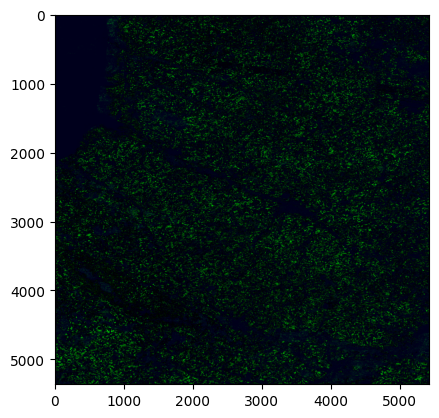

In [9]:
plt.imshow(np.moveaxis(ds.read((1,2,3)), 0, 2))

# Diagnose confusion between crop types and propose a strategy to improve model performance.


# Implement efficient geospatial processing using Rasterio, Geopandas, and parallel computation.


# Provide a structured output and recommendations on how to enhance the training pipeline.
